In [3]:
'''
Ridge es mejor que lasso, pero no es recomendable para datasets con muchas features
Lasso es una mejor opcion para datasets con muchas features
LogisticRegression es un algoritmo de classififcaion 
'''

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import mglearn
import matplotlib.pyplot as plt


In [4]:
_X, _Y = mglearn.datasets.make_forge()

C:\Users\DELL.E5430.SSD\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


C:\Users\DELL.E5430.SSD\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


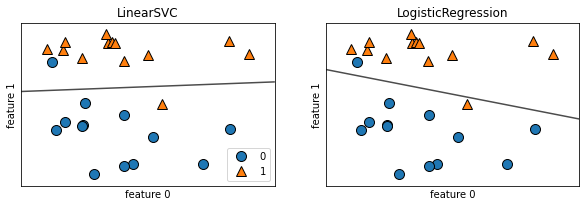

In [5]:
fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    
    clf = model.fit(_X, _Y)
    
    mglearn.plots.plot_2d_separator(clf, _X, fill=False, eps=.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(_X[:,0], _X[:,1], _Y, ax=ax)
    
    ax.set_title('{}'.format(clf.__class__.__name__))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
    
axes[0].legend(loc=4)
    

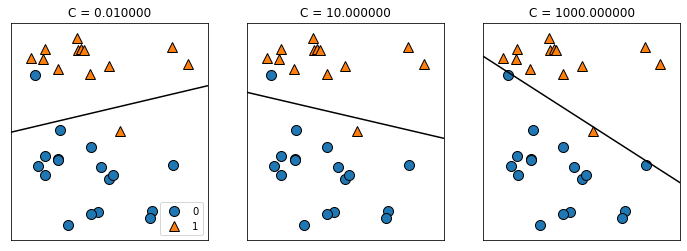

In [6]:
mglearn.plots.plot_linear_svc_regularization()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

breast = load_breast_cancer()

In [8]:
_xtrain, _xtest, _ytrain, _ytest = train_test_split(breast.data, breast.target, stratify=breast.target, random_state=42)

logreg = LogisticRegression().fit(_xtrain, _ytrain)

print('train accuracy {:.2f}'.format(logreg.score(_xtrain, _ytrain)))
print('test accuracy {:.2f}'.format(logreg.score(_xtest, _ytest)))

train accuracy 0.96
test accuracy 0.95


C:\Users\DELL.E5430.SSD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
#ahora con C=100 por default es c=1; al aumentar c da mejores resultados

logreg100 = LogisticRegression(C=100).fit(_xtrain, _ytrain)
print('train accuracy100 {:.2f}'.format(logreg100.score(_xtrain, _ytrain)))
print('test accuracy100 {:.2f}'.format(logreg100.score(_xtest, _ytest)))

train accuracy100 0.95
test accuracy100 0.96


C:\Users\DELL.E5430.SSD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
#para C=0.01

logreg001 = LogisticRegression(C=.01).fit(_xtrain, _ytrain)
print('train accuracy001 {:.3f}'.format(logreg001.score(_xtrain, _ytrain)))
print('test accuracy001 {:.3f}'.format(logreg001.score(_xtest, _ytest)))


train accuracy001 0.934
test accuracy001 0.930


C:\Users\DELL.E5430.SSD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


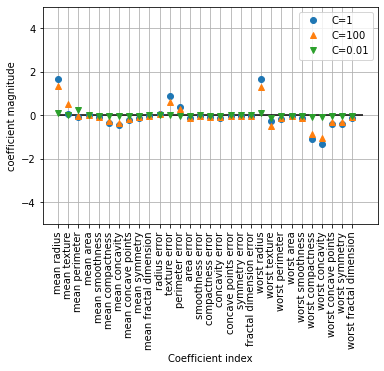

In [11]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(breast.data.shape[1]), breast.feature_names, rotation=90)
plt.hlines(0,0, breast.data.shape[1])
plt.ylim(-5,5)
plt.xlabel('Coefficient index')
plt.ylabel('coefficient magnitude')
plt.legend(loc='best')
plt.grid()
plt.show()


In [18]:
for C, marker in zip([.001, 1, 100], ['o','^','v']):
    
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(_xtrain, _ytrain)
    
    print('train accuracy C={:.3f}: {:.2f}'.format(C, lr_l1.score(_xtrain, _ytrain)))
    print('test accuracy C={:.3f}: {:.2f}'.format(C, lr_l1.score(_xtest, _ytest)))
    
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))

plt.xticks(range(breast.data.shape[1]), breast.feature_names, rotation=90)
plt.hlines(0,0,breast.data.shape[1])
plt.xlabel('coefficient index')
plt.ylabel('coefficient magnitude')
plt.ylim(-5,5)
plt.legend(loc='best')
plt.show()


ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.